In [14]:
import numpy as np
import pandas as pd
import math
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
save_dir = "Saved Data/G_withDOI_v0/"

G = nx.read_graphml(save_dir + "Graph.graphml")

In [3]:
df = pd.read_csv("../Data (Reformatted)/df_all.csv")

all_mat = set(df[(df["mat"]!="unknown")]["mat"].dropna())


all_app = set(df[(df["app"]!="unknown")]["app"].dropna())


all_prod = set(df[(df["prod"]!="unknown")]["prod"].dropna())

# MAT Similarity + MAT-APP Link Frequencies

## Read in MAT Jaccard and MAT-APP Count Data

In [9]:
data_dir = "../Inference_Results/pythia-2.8B-MC/checkpoint-7080/"

df_mat_app = pd.read_csv(data_dir + "mat_app_count.csv", index_col=0)

In [10]:
df_mat_app

,Material,Application,count
0,microsilica,reinforced fibre,0
1,microsilica,supplementary cementitious material,10
2,microsilica,coarse aggregate,1
3,microsilica,pore forming agent,0
4,microsilica,filler,0
...,...,...,...
970,MSWI fly ash,lime-pozzolan cement,1
971,MSWI fly ash,lightweight aggregate,2
972,MSWI fly ash,additive,0
973,MSWI fly ash,fine aggregate,0


In [12]:
mat_app_count = df_mat_app.pivot(index="Material", columns="Application", values="count")

mat_app_norm_col = mat_app_count.apply(lambda x: x/sum(x), axis = 0)

In [22]:
mat_app_norm_col

Application,additive,aggregate,clinker feedstock,coarse aggregate,filler,fine aggregate,geopolymer,lightweight aggregate,lime-pozzolan cement,pore forming agent,reinforced fibre,superplasticizer,supplementary cementitious material
Material,,,,,,,,,,,,,
Class C fly ash,0.000000,0.000000,0.008658,0.000000,0.000000,0.003484,0.011161,0.000000,0.0,0.0,0.012579,0.00000,0.011969
Class F fly ash,0.000000,0.000000,0.008658,0.027523,0.000000,0.020906,0.054688,0.016949,0.0,0.0,0.006289,0.02381,0.022741
Corex slag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000299
FeMn arc-furnace slag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002232,0.000000,0.0,0.0,0.000000,0.00000,0.000299
MSWI bottom ash,0.000000,0.022936,0.004329,0.000000,0.016667,0.013937,0.003348,0.016949,0.0,0.0,0.000000,0.00000,0.005386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
waste glass,0.095238,0.096330,0.047619,0.055046,0.066667,0.216028,0.042411,0.084746,0.0,0.0,0.037736,0.02381,0.048474
waste rubber particles,0.000000,0.000000,0.000000,0.009174,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.001496
water treatment sludge,0.047619,0.004587,0.004329,0.009174,0.000000,0.003484,0.007812,0.000000,0.0,0.0,0.000000,0.00000,0.003591


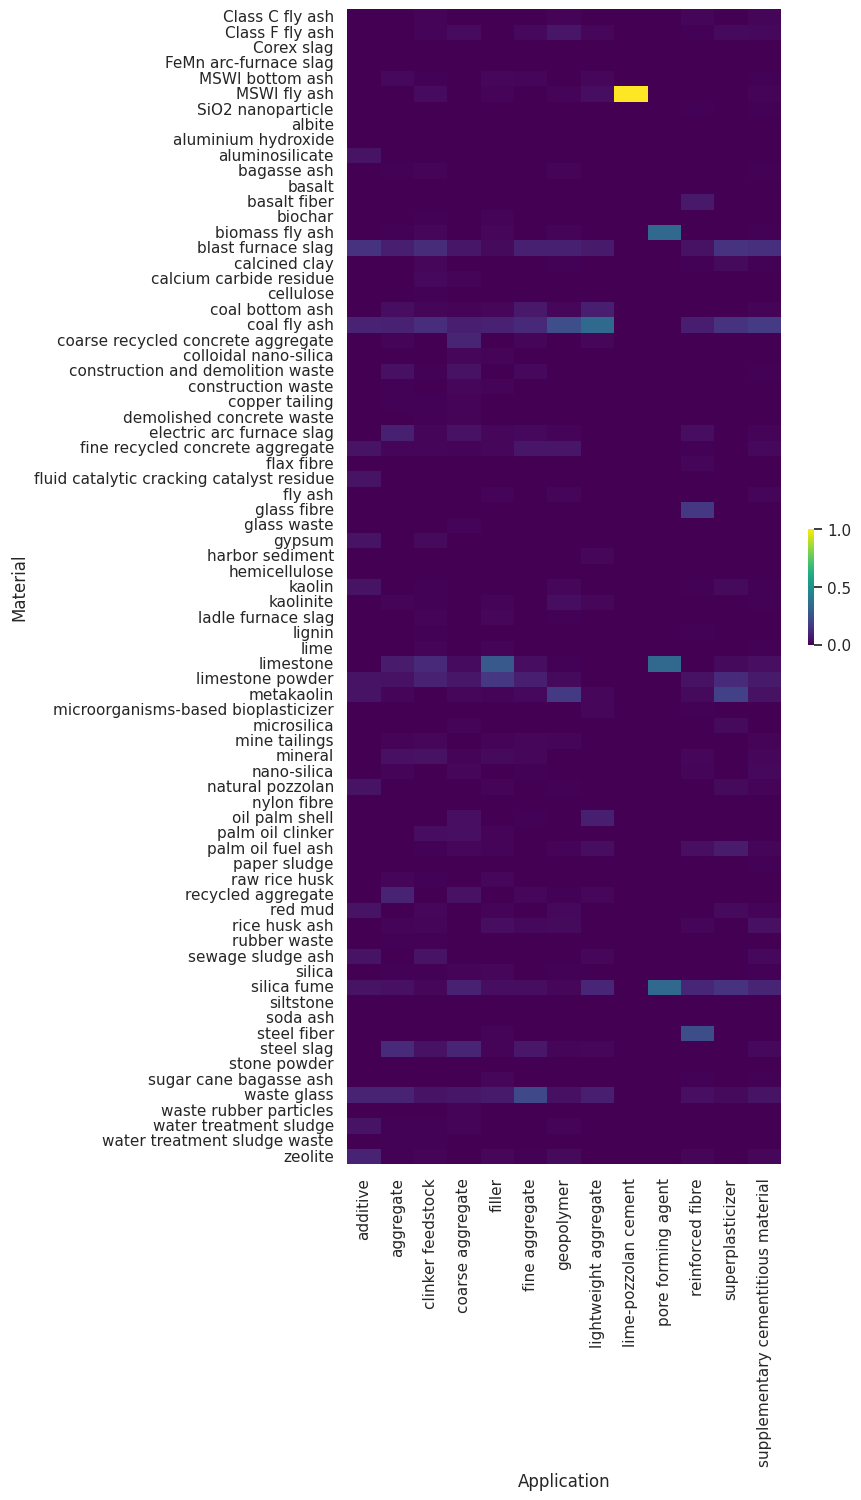

In [17]:
sns.set(rc={'figure.figsize':(7, 15)})

heatmap = sns.heatmap(mat_app_norm_col, cmap="viridis", cbar_kws={'shrink': 0.1}, xticklabels=True, yticklabels=True)

fig = heatmap.get_figure()

fig.savefig("../Figs/mat_app_heatmap_normCol.jpg", bbox_inches="tight")

In [19]:
df_mat_jaccard = pd.read_csv(save_dir + "MAT_Jaccard.csv")

jaccard = df_mat_jaccard.pivot(index="material1", columns="material2", values="jaccard")

jaccard

material2,Class C fly ash,Class F fly ash,Corex slag,FeMn arc-furnace slag,MSWI bottom ash,MSWI fly ash,SiO2 nanoparticle,albite,aluminium hydroxide,aluminosilicate,...,soda ash,steel fiber,steel slag,stone powder,sugar cane bagasse ash,waste glass,waste rubber particles,water treatment sludge,water treatment sludge waste,zeolite
material1,,,,,,,,,,,,,,,,,,,,,
Class C fly ash,1.000000,0.029703,0.016129,0.031250,0.040404,0.027273,0.036145,0.015873,0.016129,0.030769,...,0.016129,0.029126,0.018868,0.013699,0.035714,0.012407,0.014706,0.045455,0.030769,0.031646
Class F fly ash,0.029703,1.000000,0.006757,0.013333,0.027174,0.020513,0.017751,0.006711,0.006757,0.013245,...,0.006757,0.015873,0.020270,0.006289,0.017647,0.016461,0.013072,0.028902,0.013245,0.020492
Corex slag,0.016129,0.006757,1.000000,0.166667,0.023256,0.018868,0.038462,0.250000,0.000000,0.142857,...,0.333333,0.021739,0.006410,0.071429,0.037037,0.002874,0.111111,0.031250,0.142857,0.009709
FeMn arc-furnace slag,0.031250,0.013333,0.166667,1.000000,0.044444,0.036364,0.071429,0.142857,0.166667,0.222222,...,0.166667,0.041667,0.012658,0.058824,0.033333,0.005714,0.083333,0.058824,0.100000,0.019048
MSWI bottom ash,0.040404,0.027174,0.023256,0.044444,1.000000,0.056180,0.030769,0.022727,0.023256,0.043478,...,0.023256,0.035714,0.036842,0.018519,0.046154,0.020997,0.020408,0.073529,0.066667,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
waste glass,0.012407,0.016461,0.002874,0.005714,0.020997,0.012690,0.008130,0.002865,0.002874,0.008571,...,0.002874,0.010309,0.016194,0.002786,0.010840,1.000000,0.005666,0.018868,0.008571,0.018141
waste rubber particles,0.014706,0.013072,0.111111,0.083333,0.020408,0.016949,0.031250,0.100000,0.000000,0.076923,...,0.111111,0.019231,0.012422,0.050000,0.030303,0.005666,1.000000,0.054054,0.076923,0.018519
water treatment sludge,0.045455,0.028902,0.031250,0.058824,0.073529,0.037500,0.037037,0.030303,0.031250,0.088235,...,0.031250,0.027027,0.033333,0.023256,0.036364,0.018868,0.054054,1.000000,0.088235,0.047244


## Multiply Jaccard Matrix and Col-normalized MAT-APP Count Heatmap Matrix

<AxesSubplot:xlabel='Application', ylabel='Material'>

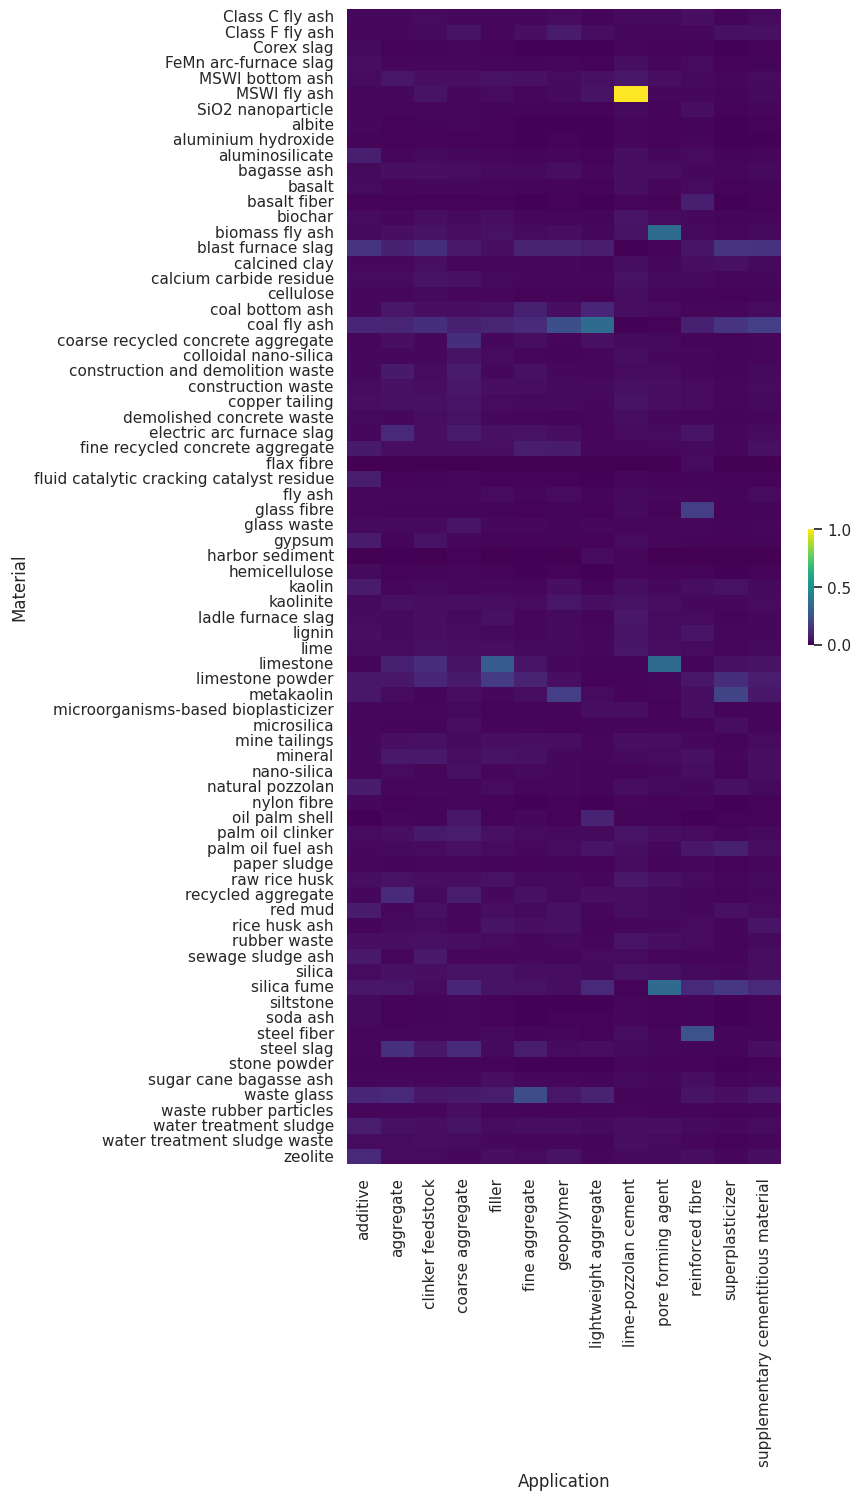

In [32]:
new_mat_app = np.matmul(jaccard.to_numpy(), mat_app_norm_col.to_numpy())

df_new_mat_app = mat_app_norm_col.copy(deep=True)
df_new_mat_app.iloc[:,:] = new_mat_app

sns.set(rc={'figure.figsize':(7, 15)})

sns.heatmap(df_new_mat_app, cmap="viridis", cbar_kws={'shrink': 0.1}, xticklabels=True, yticklabels=True)

## Use MAT-APP Heatmap Differences to Reflect Potential New Links

### Direct Subtraction

<AxesSubplot:xlabel='Application', ylabel='Material'>

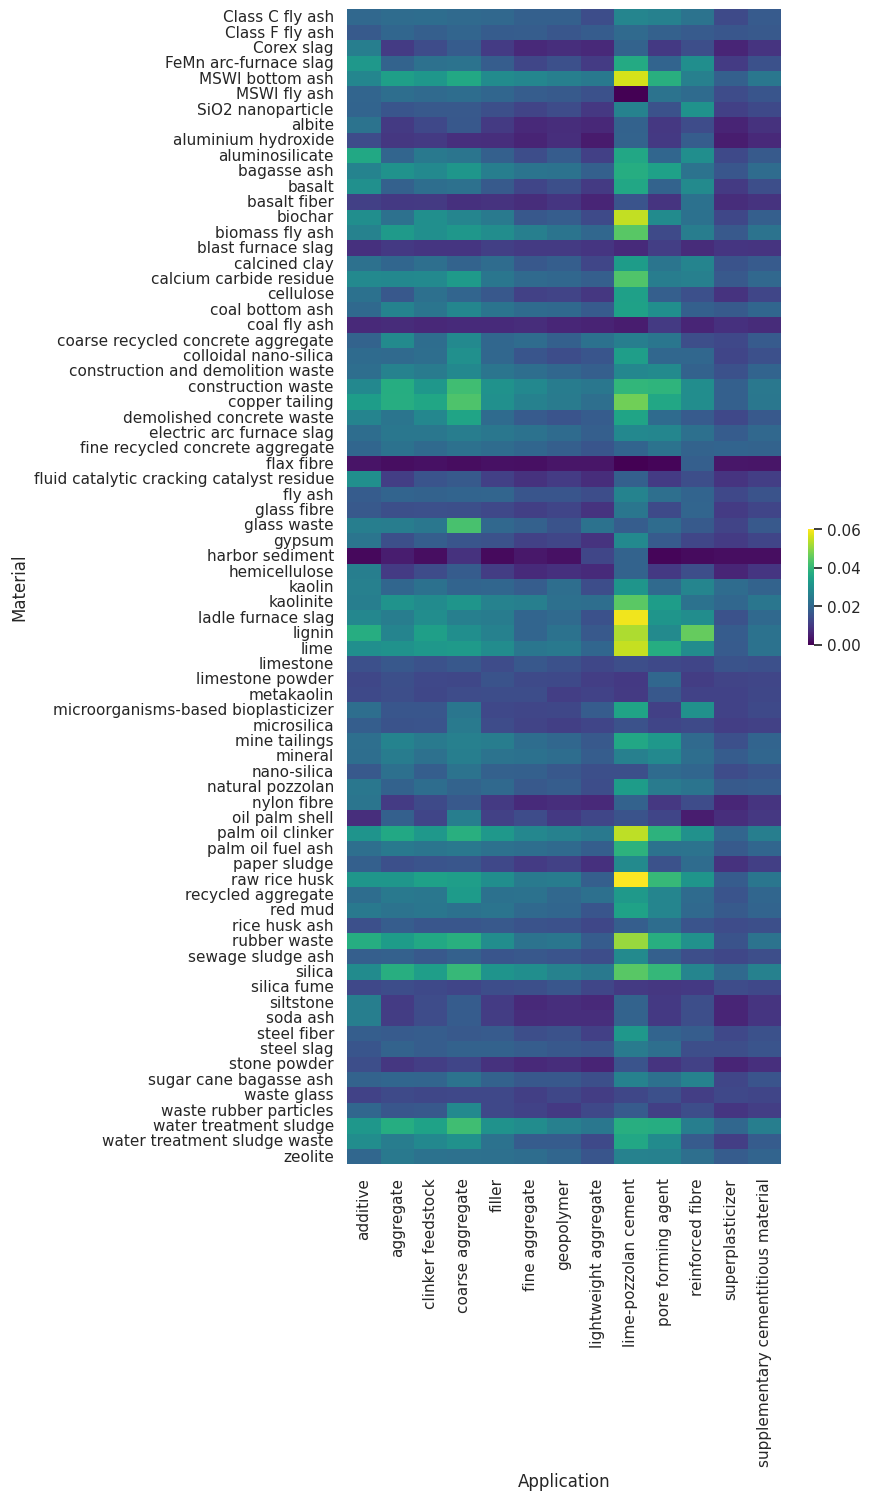

In [33]:
heatmap_diff = df_new_mat_app - mat_app_norm_col

sns.heatmap(heatmap_diff, cmap="viridis", cbar_kws={'shrink': 0.1}, vmax=0.06, xticklabels=True, yticklabels=True)


### Only Focus on Previously "0" Links

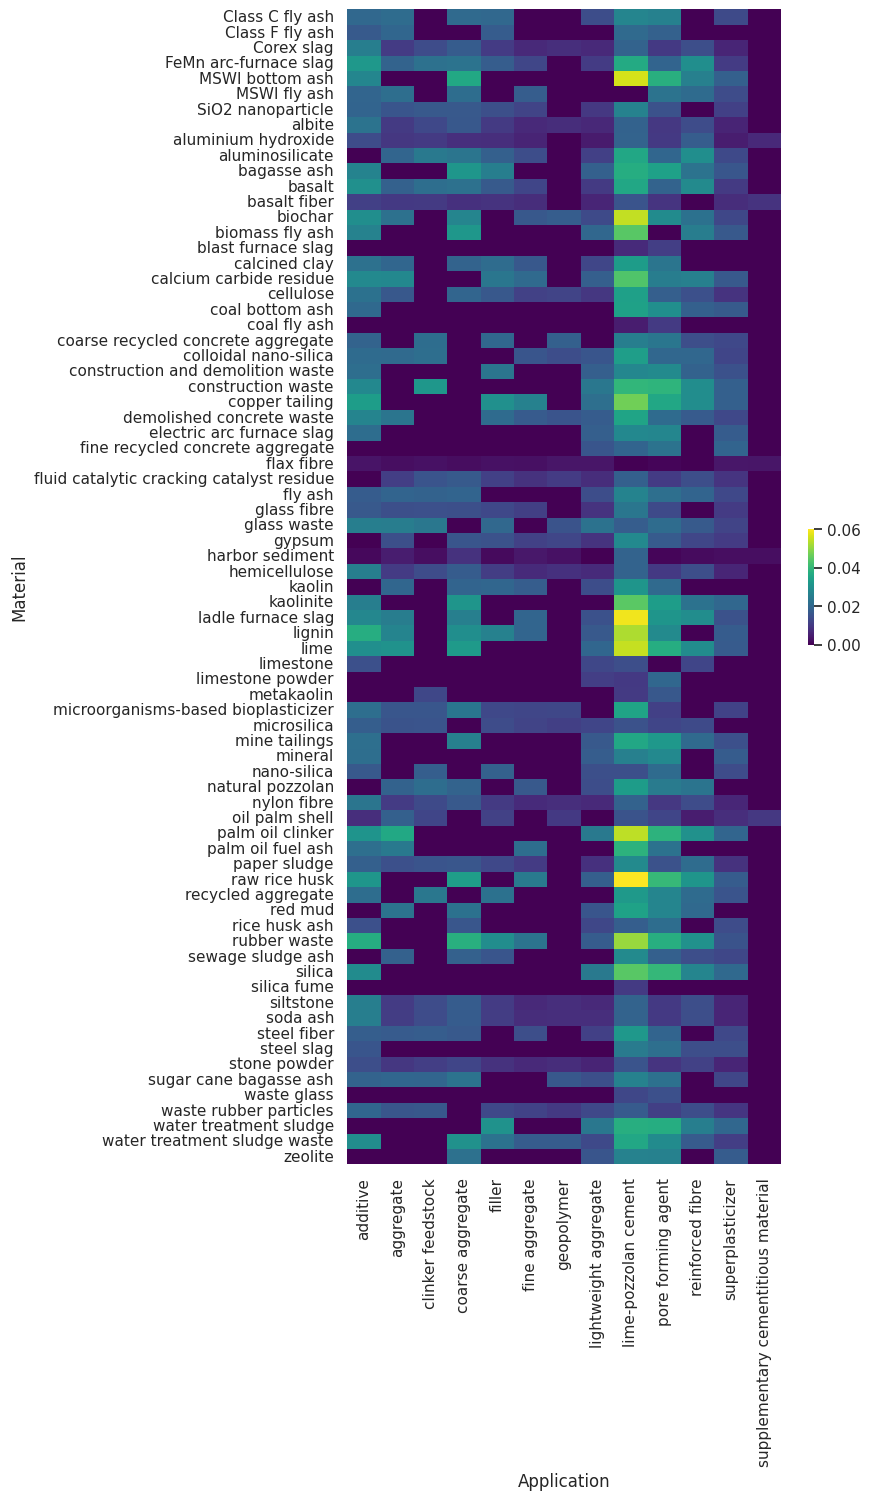

In [41]:
heatmap_diff_at0 = heatmap_diff[mat_app_norm_col == 0].fillna(0)

sns.set(rc={'figure.figsize':(7, 15)})

heatmap = sns.heatmap(heatmap_diff_at0, cmap="viridis", cbar_kws={'shrink': 0.1}, vmax=0.06, 
            xticklabels=True, yticklabels=True)


fig = heatmap.get_figure()

fig.savefig("../Figs/Graph/mat_app_link_pred_matSim.jpg", bbox_inches="tight")

# Katz Measure

In [54]:
adj_matrix = nx.to_numpy_array(G)

# Calculate the eigenvalues using numpy
eigenvalues = np.linalg.eigvals(adj_matrix)

In [62]:
lambda_largest = float(sorted(eigenvalues, reverse=True)[0])

alpha = 0.95 * 1/lambda_largest

print("alpha = {}".format(alpha))

alpha = 0.0009896815827220044


/tmp/ipykernel_218967/1280599074.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  lambda_largest = float(sorted(eigenvalues, reverse=True)[0])


In [63]:
katz_centrality = nx.katz_centrality_numpy(G, alpha=alpha, weight="weight")

## Locate MAT and APP Nodes

In [64]:
mat_nodes = [node for node, data in G.nodes(data=True) if data.get("node_type") == "material"]
app_nodes = [node for node, data in G.nodes(data=True) if data.get("node_type") == "application"]

In [65]:
mat_katz = []
app_katz = []
for node, katz in sorted(katz_centrality.items()):
    if node in mat_nodes:
        mat_katz.append(
            {
                "material": node,
                "katz": katz
            })
    if node in app_nodes:
        app_katz.append(
            {
                "application": node,
                "katz": katz
            })

## Calculate Katz Product to Reflect Link Importance

In [70]:
mat_app_katz = pd.DataFrame.from_records(mat_katz).merge(pd.DataFrame.from_records(app_katz), 
                                                         how="cross").rename(columns={"katz_x": "katz_mat",
                                                                                      "katz_y": "katz_app"})

mat_app_katz

,material,katz_mat,application,katz_app
0,Class C fly ash,0.029244,additive,0.010213
1,Class C fly ash,0.029244,aggregate,0.028774
2,Class C fly ash,0.029244,clinker feedstock,0.033695
3,Class C fly ash,0.029244,coarse aggregate,0.017465
4,Class C fly ash,0.029244,filler,0.019765
...,...,...,...,...
970,zeolite,0.039170,lime-pozzolan cement,0.007956
971,zeolite,0.039170,pore forming agent,0.008197
972,zeolite,0.039170,reinforced fibre,0.020618
973,zeolite,0.039170,superplasticizer,0.014344


In [72]:
mat_app_katz["katz_product"] = mat_app_katz["katz_mat"] * mat_app_katz["katz_app"]

mat_app_katz

,material,katz_mat,application,katz_app,katz_product
0,Class C fly ash,0.029244,additive,0.010213,0.000299
1,Class C fly ash,0.029244,aggregate,0.028774,0.000841
2,Class C fly ash,0.029244,clinker feedstock,0.033695,0.000985
3,Class C fly ash,0.029244,coarse aggregate,0.017465,0.000511
4,Class C fly ash,0.029244,filler,0.019765,0.000578
...,...,...,...,...,...
970,zeolite,0.039170,lime-pozzolan cement,0.007956,0.000312
971,zeolite,0.039170,pore forming agent,0.008197,0.000321
972,zeolite,0.039170,reinforced fibre,0.020618,0.000808
973,zeolite,0.039170,superplasticizer,0.014344,0.000562


In [73]:
mat_app_katz.to_csv(save_dir + "MAT_APP_katz.csv", index=False)

## Link Prediction

### Direct Showing Katz Product

<AxesSubplot:xlabel='application', ylabel='material'>

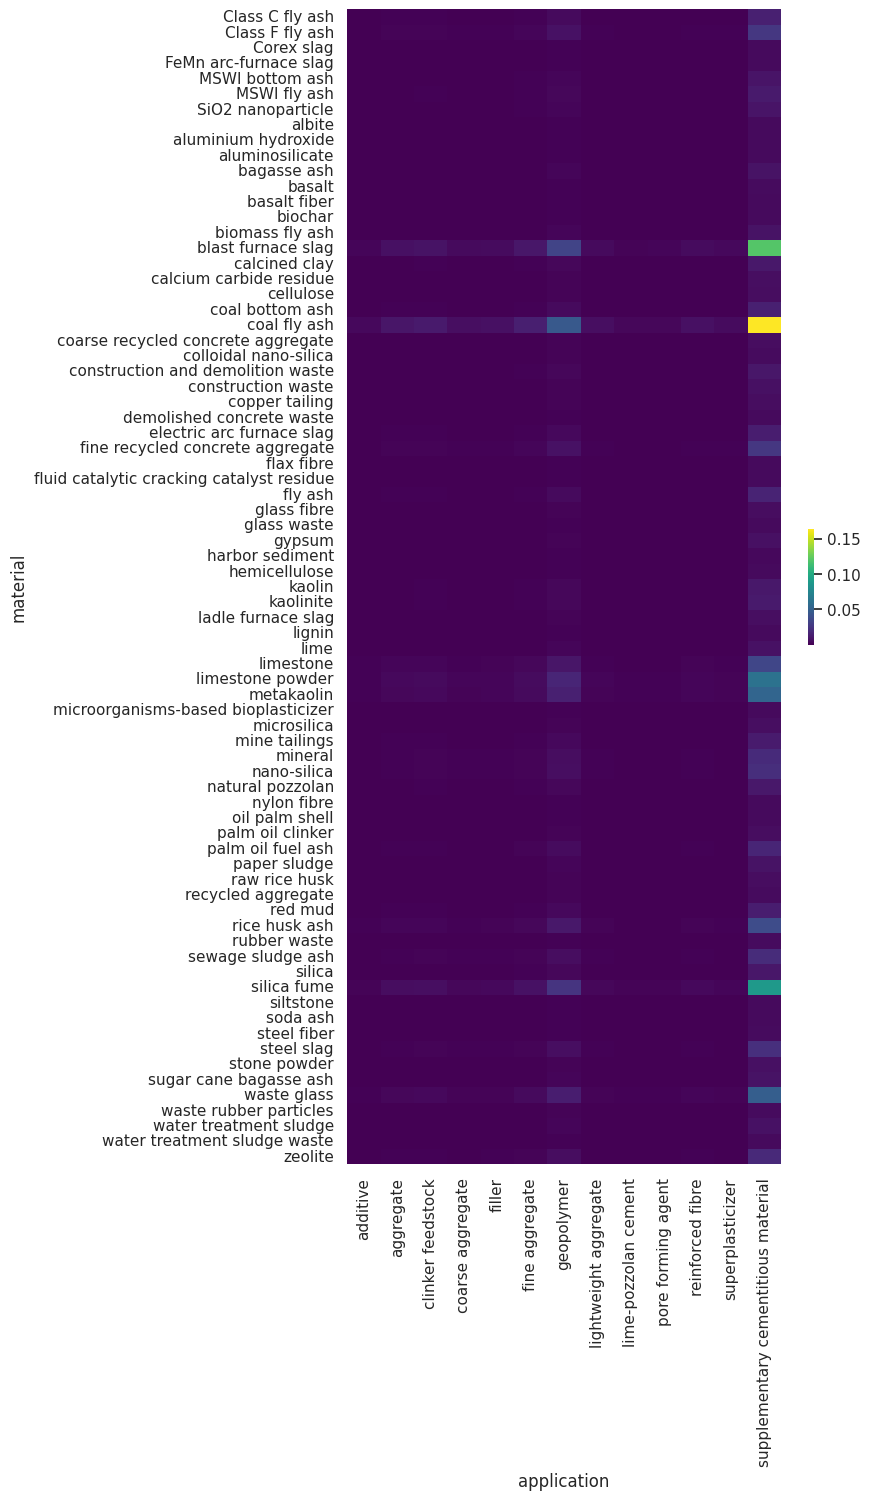

In [75]:
import seaborn as sns

katz_data = mat_app_katz.pivot(index="material", columns="application", values="katz_product")

sns.set(rc={'figure.figsize':(7, 15)})

sns.heatmap(katz_data, cmap="viridis", cbar_kws={'shrink': 0.1}, xticklabels=True, yticklabels=True)

### Only Focus on Previously "0" Entries

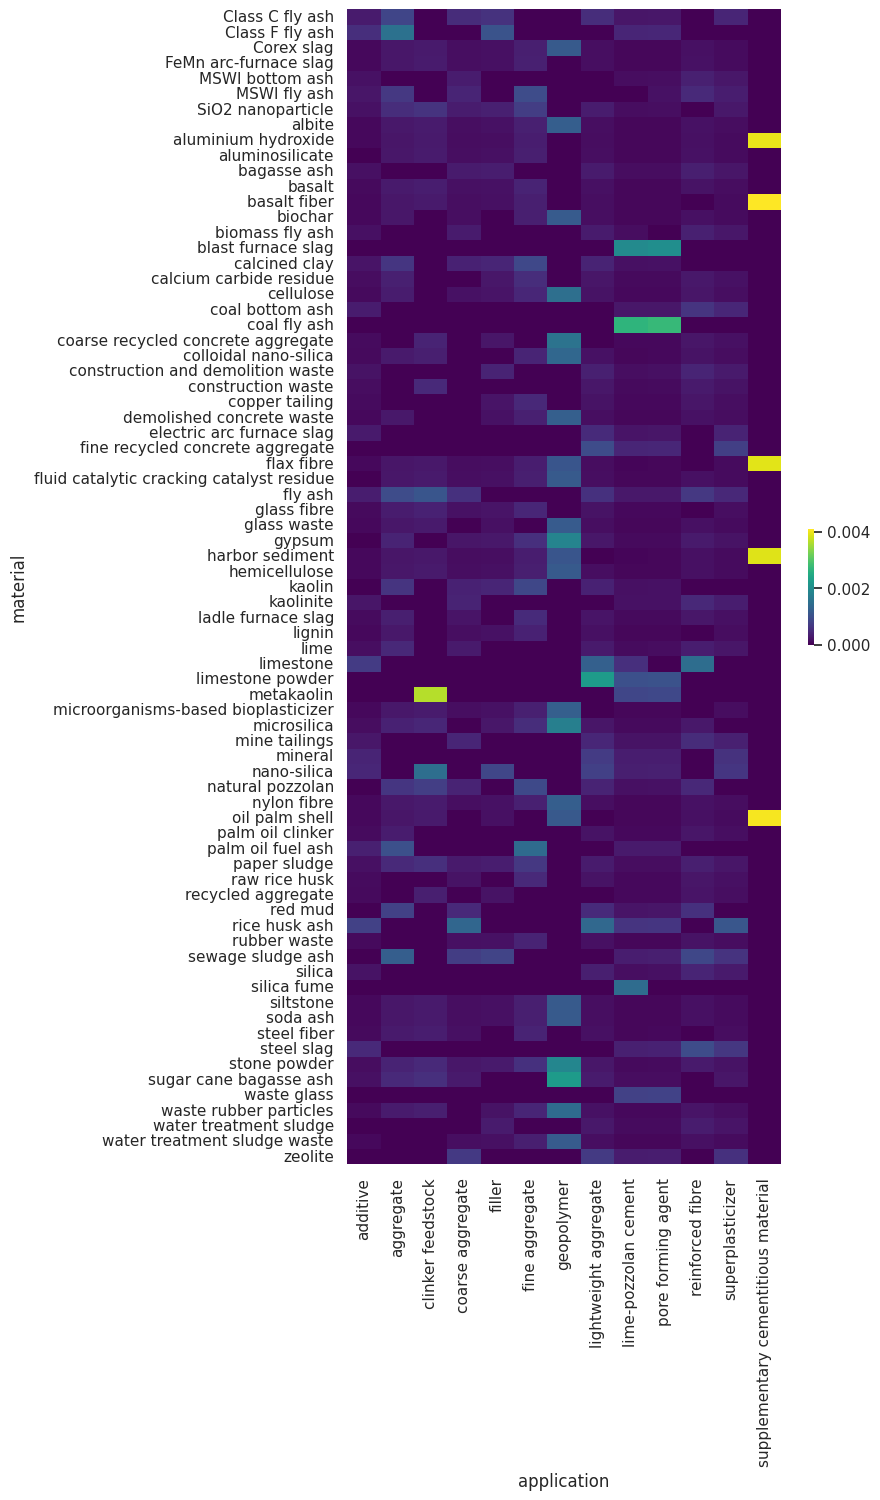

In [76]:
katz_data_at0 = katz_data[mat_app_norm_col == 0].fillna(0)

sns.set(rc={'figure.figsize':(7, 15)})

heatmap = sns.heatmap(katz_data_at0, cmap="viridis", cbar_kws={'shrink': 0.1}, xticklabels=True, yticklabels=True)

fig = heatmap.get_figure()

fig.savefig("../Figs/Graph/mat_app_link_pred_Katz.jpg", bbox_inches="tight")